# Chronic Kidney Disease Classification

This notebook looks into classifying whether a given data about someone might have chronic kidney disease or not using the k-Nearest Neighbors.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

The data used in this notebook is from the [UCI Machine Learning Repository Chronic Kidney Disease Dataset](https://archive.ics.uci.edu/ml/datasets/chronic_kidney_disease). Below is the data dictionary with further detail on each attributes.

|Column|Type|Value|
|-|-|-|
|age (age)|numerical|age in years|
|bp (blood pressure)|numerical|bp in mm/Hg|
|sg (specific gravity)|nominal|[1.005, 1.010, 1.020, 1.025]|
|al (albumin)|nominal|[0, 1, 2, 3, 4, 5]|
|su (sugar)|nominal|[0, 1, 2, 3, 4, 5]|
|rbc (red blood cells)|nominal|normal, abnormal|
|pc (pus cell)|nominal|normal, abnormal|
|pcc (pus cell clumps)|nominal|present, notpresent|
|ba (bacteria)|nominal|present, notpresent|
|bgr (blood glucose random)|numerical|bgr in mgs/dl|
|bu (blood urea)|numerical|bu in mgs/dl|
|sc (serum creatinine)|numerical|sc in mgs/dl|
|sod (sodium)|numerical|sod in mEq/L|
|pot (potassium)|numerical|pot in mEq/L|
|hemo (hemoglobin)|numerical|hemo in gms|
|pcv (packed cell volume)|numerical|percentage of cells in blood|
|white blood cell count (wc)|numerical|wc in cells/cumm|
|red blood cell count (rc)|numerical|rc in millions/cmm|
|hypertension (htn)|nominal|yes, no|
|dm (diabetes mellitus)|nominal|yes, no|
|cad (coronary artery disease)|nominal|yes, no|
|appet (appetite)|nominal|good, poor|
|pe (pedal edema)|nominal|yes, no|
|ane (anemia)|nominal|yes, no|
|classification|nominal|ckd, notckd|



In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/dzniel/ckd-classification/main/data/chronic-kidney-disease.csv")
data.shape

(400, 26)

In [3]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
data.tail()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


We consider the `id` column to be unnecessary and kind of meaningless, so we can get rid of it immediately.

In [5]:
data.drop("id", axis=1, inplace=True)
data.shape

(400, 25)

Renaming the column names should make the data easier to interpret throughout the experimentation.

In [6]:
data.columns = ["age",
                "blood_pressure",
                "specific_gravity",
                "albumin",
                "sugar",
                "red_blood_cells",
                "pus_cell",
                "pus_cell_clumps",
                "bacteria",
                "blood_glucose_random",
                "blood_urea",
                "serum_creatinine",
                "sodium",
                "potassium",
                "hemoglobin",
                "packed_cell_volume",
                "white_blood_cell_count",
                "red_blood_cell_count",
                "hypertension",
                "diabetes_mellitus",
                "coronary_artery_disease",
                "appetite",
                "pedal_edema",
                "anemia",
                "class"]

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

From the above information, it is obvious that some attributes have incorrect data type which are:

* `packed_cell_volume`
* `white_blood_cell_count`
* `red_blood_cell_count`

In [8]:
incorrect_type_attributes = ["packed_cell_volume", "white_blood_cell_count", "red_blood_cell_count"]
for attribute in incorrect_type_attributes:
  data[attribute] = pd.to_numeric(data[attribute], errors="coerce")

In [9]:
categorical_columns = list(data.select_dtypes(['object']).columns)
for column in categorical_columns:
    print(f"{column}: {data[column].unique()}\n")

red_blood_cells: [nan 'normal' 'abnormal']

pus_cell: ['normal' 'abnormal' nan]

pus_cell_clumps: ['notpresent' 'present' nan]

bacteria: ['notpresent' 'present' nan]

hypertension: ['yes' 'no' nan]

diabetes_mellitus: ['yes' 'no' ' yes' '\tno' '\tyes' nan]

coronary_artery_disease: ['no' 'yes' '\tno' nan]

appetite: ['good' 'poor' nan]

pedal_edema: ['no' 'yes' nan]

anemia: ['no' 'yes' nan]

class: ['ckd' 'ckd\t' 'notckd']



Another thing is some attributes also contain incorrect values which are:

* `diabetes_mellitus`
* `coronary_artery_disease`
* `class`

In [10]:
data["diabetes_mellitus"] = data["diabetes_mellitus"].str.replace(r"\s*", "", regex=True)
data["coronary_artery_disease"] = data["coronary_artery_disease"].str.replace(r"\s*", "", regex=True)
data["class"] = data["class"].str.replace(r"\s*", "", regex=True)

In [11]:
for column in categorical_columns:
    print(f"{column}: {data[column].unique()}\n")

red_blood_cells: [nan 'normal' 'abnormal']

pus_cell: ['normal' 'abnormal' nan]

pus_cell_clumps: ['notpresent' 'present' nan]

bacteria: ['notpresent' 'present' nan]

hypertension: ['yes' 'no' nan]

diabetes_mellitus: ['yes' 'no' nan]

coronary_artery_disease: ['no' 'yes' nan]

appetite: ['good' 'poor' nan]

pedal_edema: ['no' 'yes' nan]

anemia: ['no' 'yes' nan]

class: ['ckd' 'notckd']



Let's take a closer look into each attribute's distribution.

In [12]:
plt.style.use("fivethirtyeight")

def plot_distribution(column, data=data):
  fig, (ax_hist, ax_box) = plt.subplots(nrows=2,
                                        figsize=(10, 7),
                                        sharex=True,
                                        gridspec_kw={"height_ratios": [1, 0.1]})
  
  sns.histplot(x=column, kde=True, ax=ax_hist, data=data, color="salmon")
  sns.boxplot(x=column, ax=ax_box, data=data, color="violet")
  fig.suptitle(f"{column.upper()} Distribution")
  ax_hist.set(xlabel='', ylabel="count")
  ax_box.set(xlabel=column)
  plt.show()

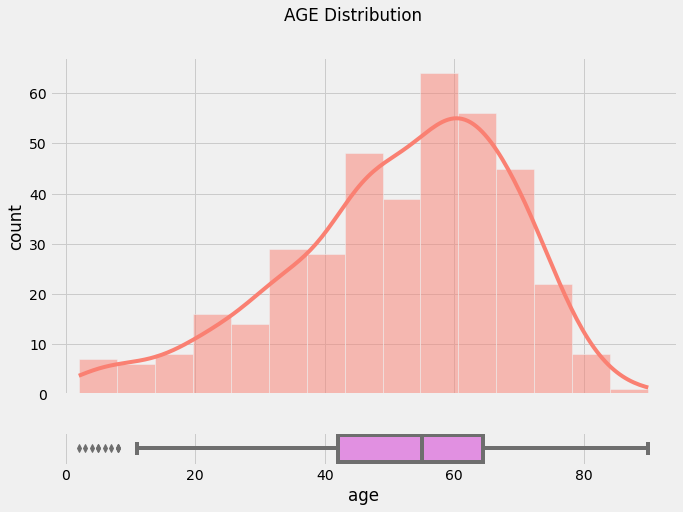

In [13]:
plot_distribution("age")

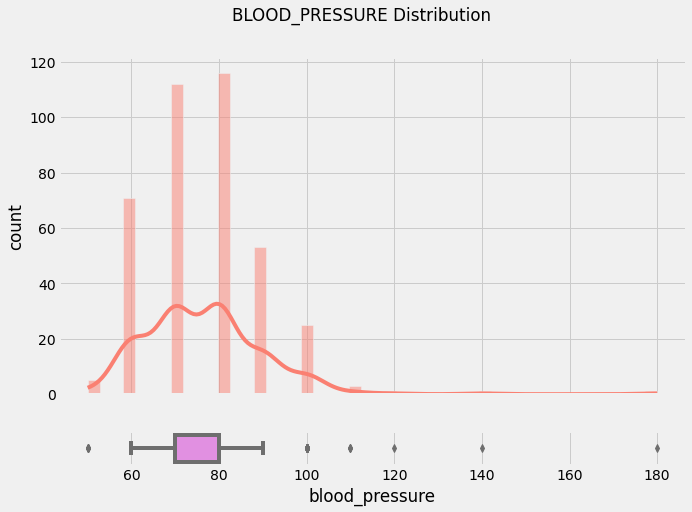

In [14]:
plot_distribution("blood_pressure")

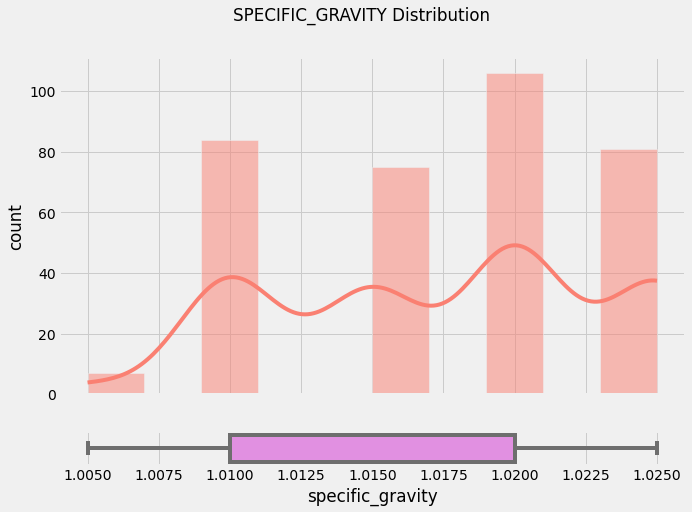

In [15]:
plot_distribution("specific_gravity")

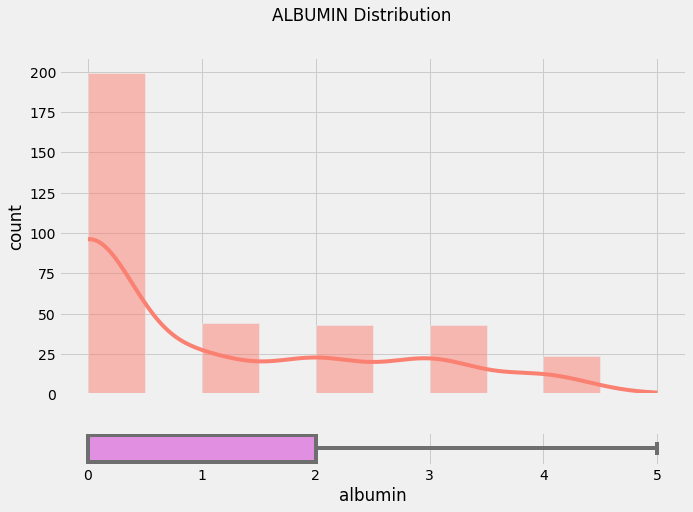

In [16]:
plot_distribution("albumin")

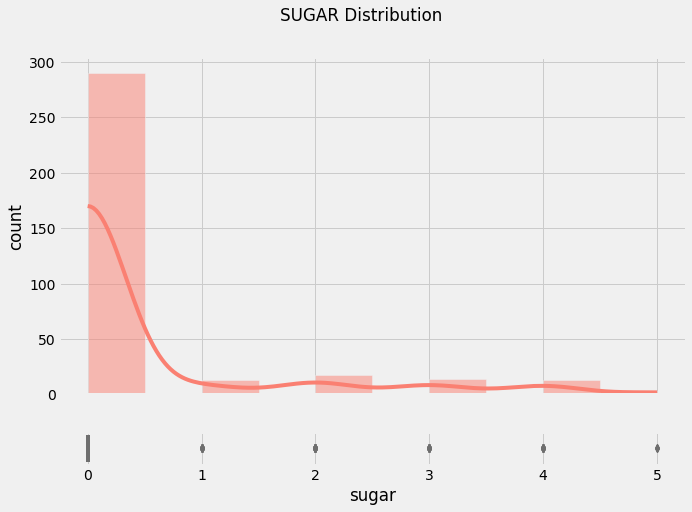

In [17]:
plot_distribution("sugar")

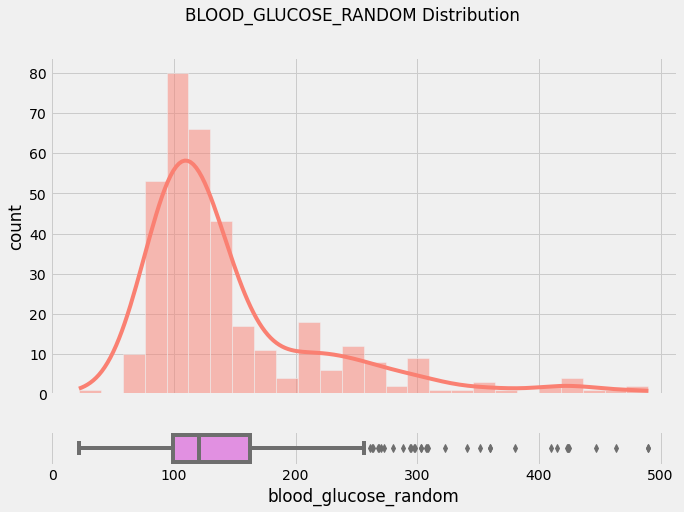

In [18]:
plot_distribution("blood_glucose_random")

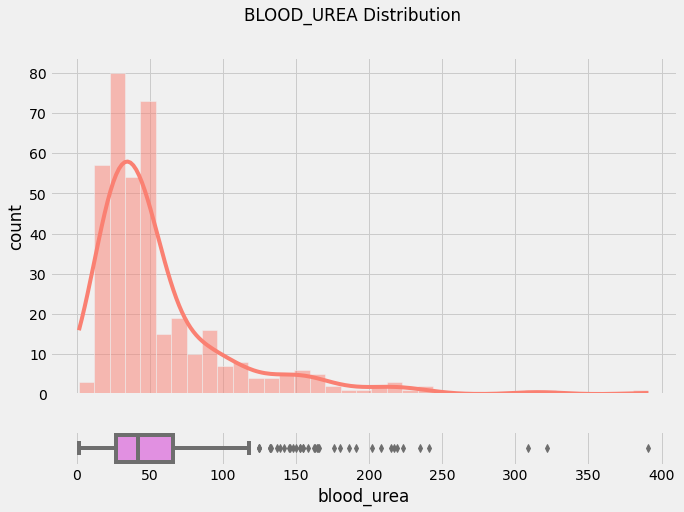

In [19]:
plot_distribution("blood_urea")

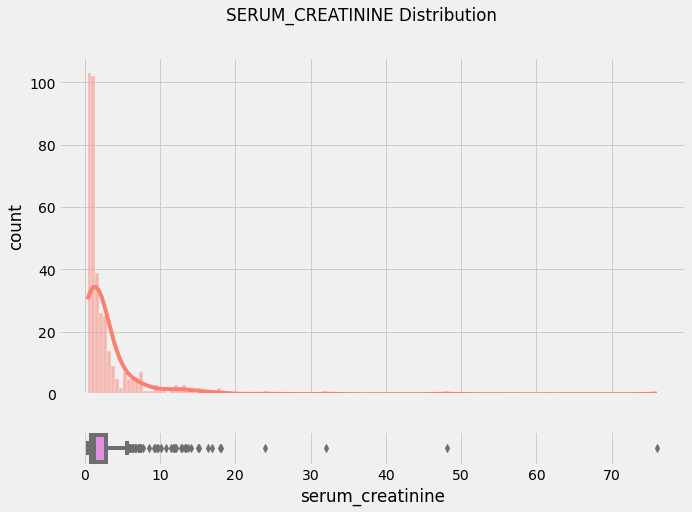

In [20]:
plot_distribution("serum_creatinine")

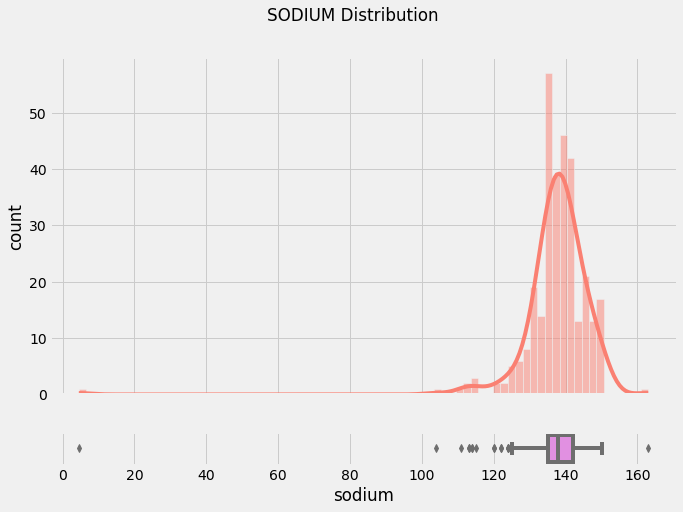

In [21]:
plot_distribution("sodium")

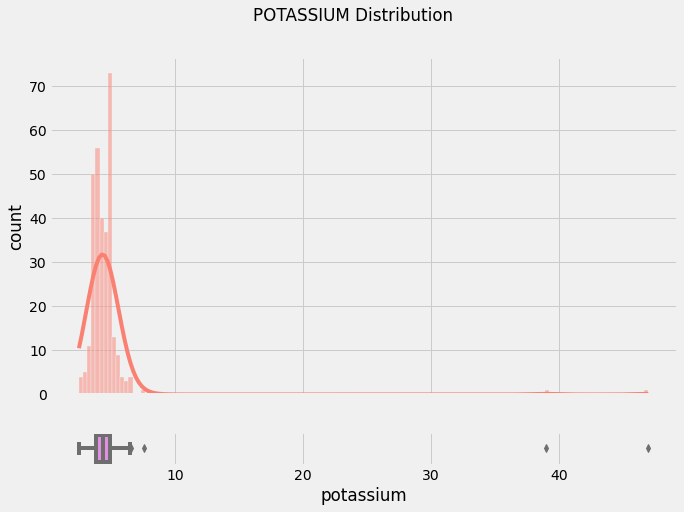

In [22]:
plot_distribution("potassium")

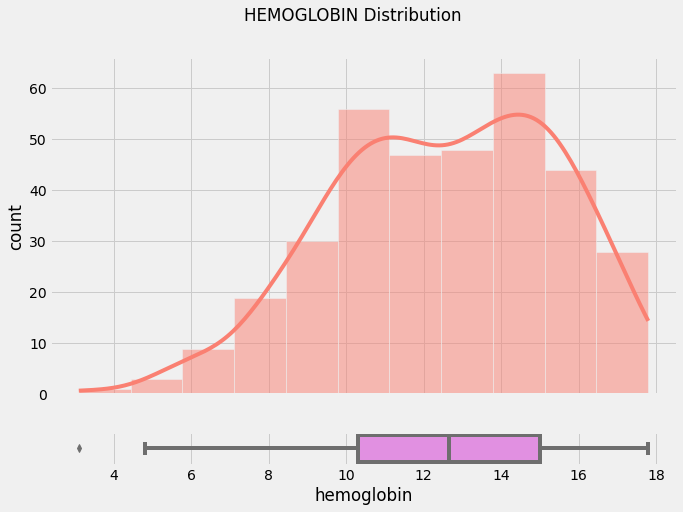

In [23]:
plot_distribution("hemoglobin")

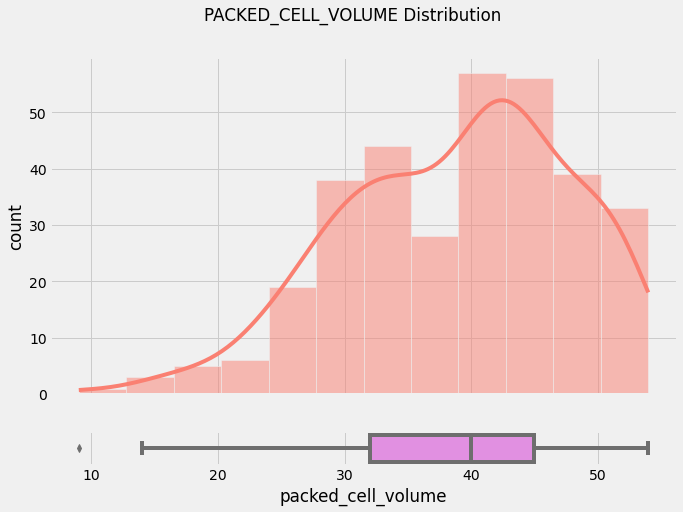

In [24]:
plot_distribution("packed_cell_volume")

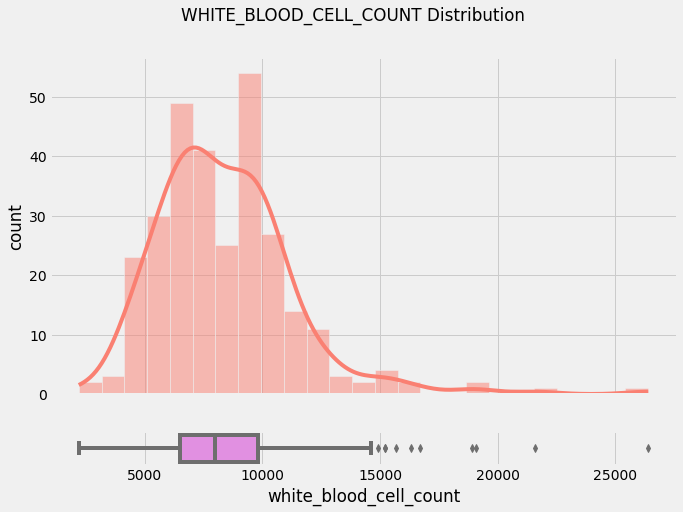

In [25]:
plot_distribution("white_blood_cell_count")

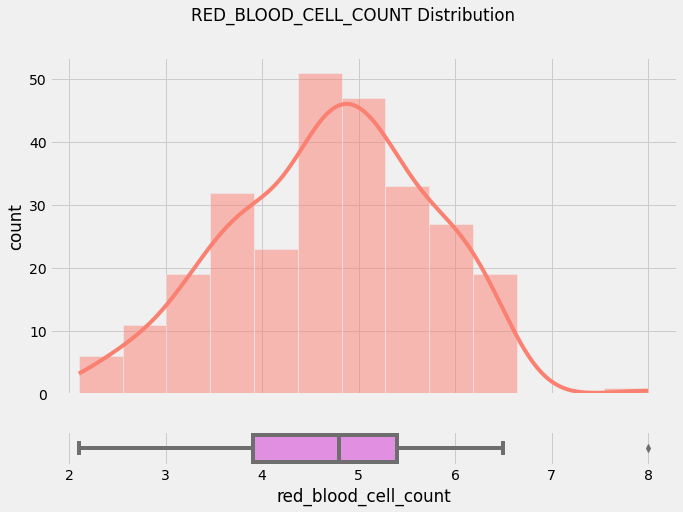

In [26]:
plot_distribution("red_blood_cell_count")

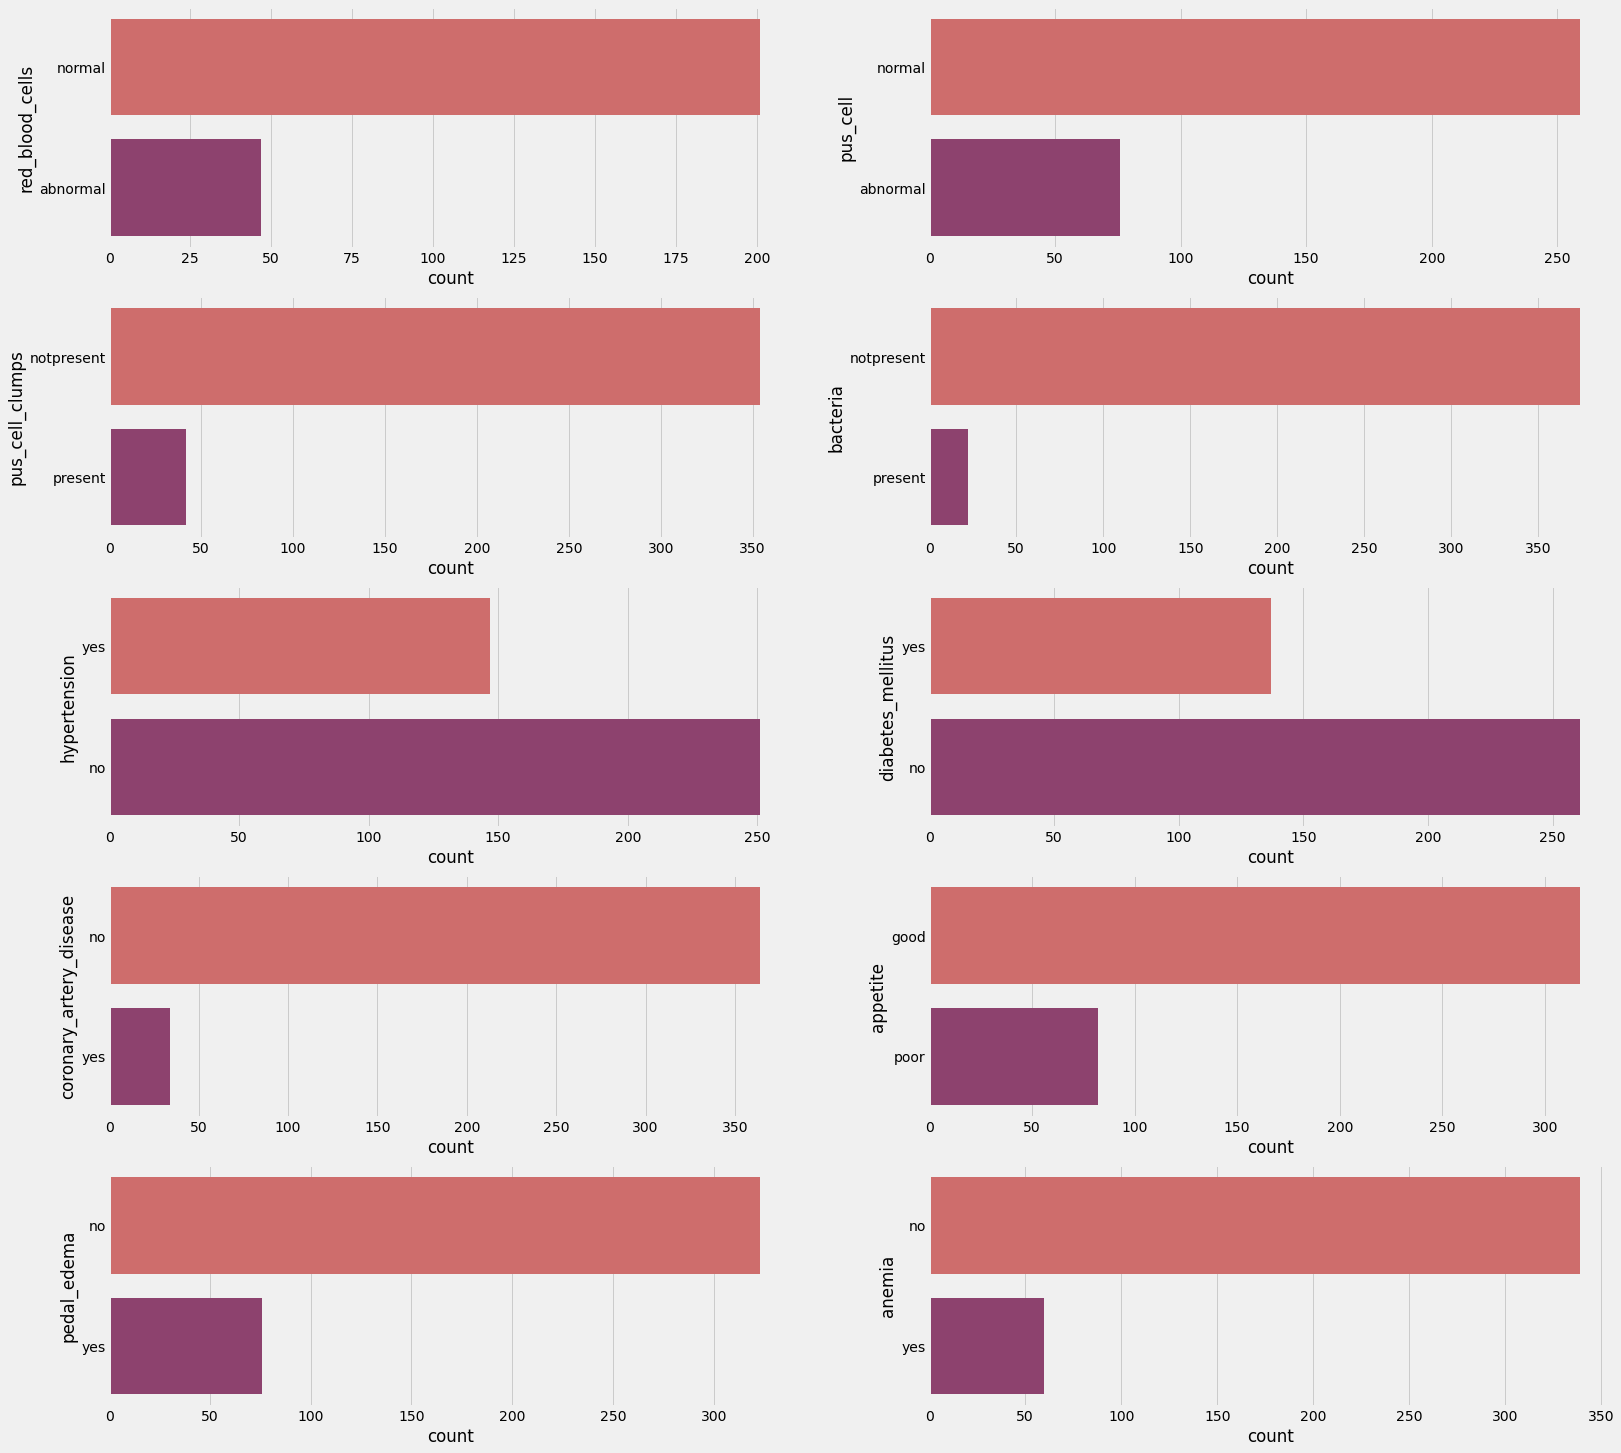

In [27]:
fig, axes = plt.subplots(nrows=5,
                         ncols=2,
                         figsize=(24, 24))

for ax, column in zip(axes.flatten(), categorical_columns):
  sns.countplot(y=column, data=data, ax=ax, palette="flare")

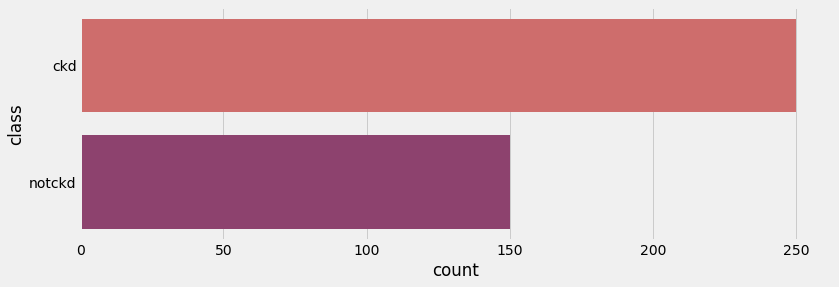

In [28]:
plt.figure(figsize=(12, 4))
sns.countplot(y="class",
              data=data,
              palette="flare")

plt.show()

Some columns have plenty of outliers which we might want to remove. Correlation matrix would be a good initial representation of how we want to select the features and deal with outliers. We would want to label encode categorical columns prior to visualizing correlation matrix.

In [29]:
encoder = LabelEncoder()
for column in categorical_columns:
  data[column] = encoder.fit_transform(data[column])

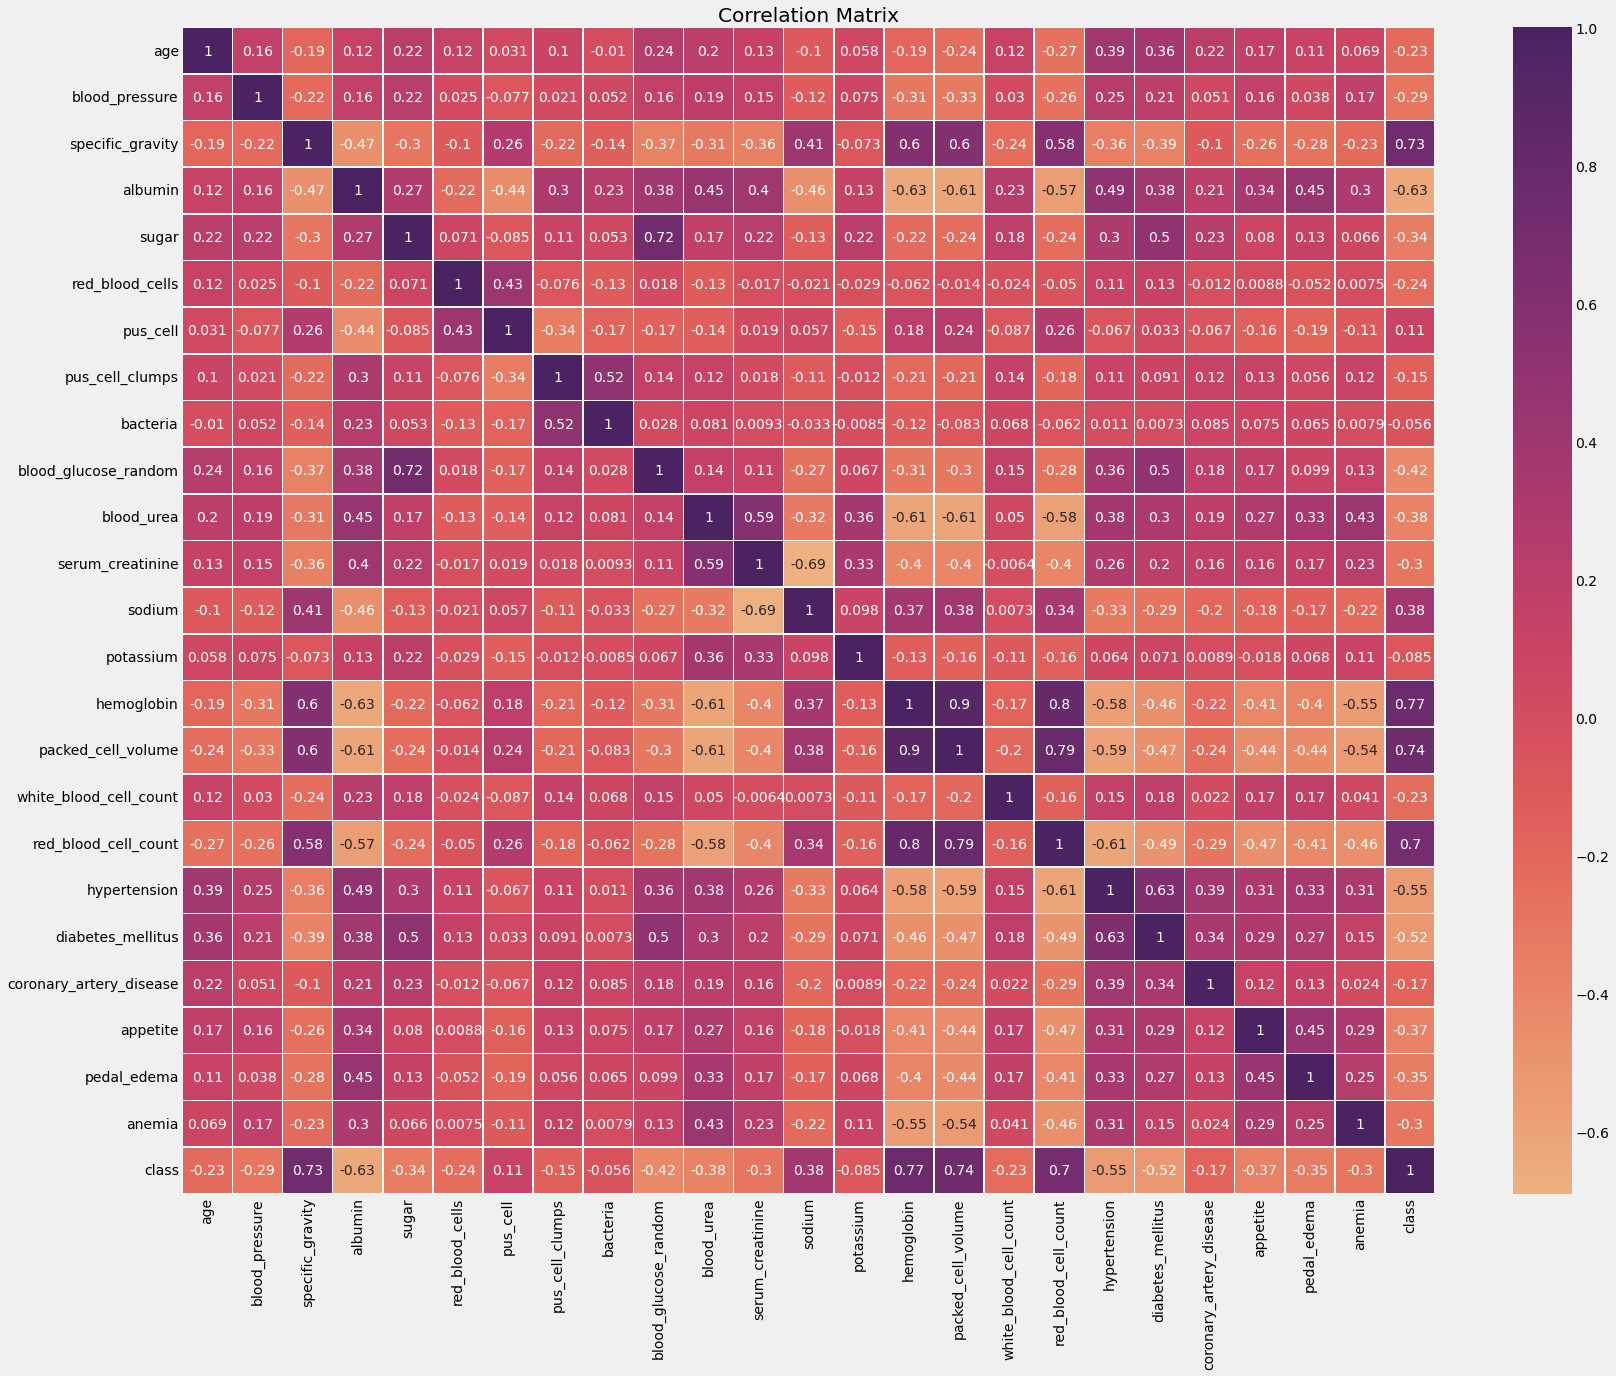

In [30]:
fig, ax = plt.subplots(figsize=(25, 20))
sns.heatmap(data.corr(),  
            linewidths=.5,
            annot=True, 
            ax=ax,
            cmap="flare").set_title("Correlation Matrix")

plt.show()

From the correlation matrix, we identified a few number of features that have weak correlation to the target variable.

In [31]:
labels_to_drop = ["age", 
                  "blood_pressure", 
                  "sugar", 
                  "red_blood_cells",
                  "pus_cell",
                  "pus_cell_clumps",
                  "bacteria",
                  "blood_glucose_random", 
                  "blood_urea", 
                  "serum_creatinine", 
                  "sodium",
                  "potassium",
                  "coronary_artery_disease",
                  "appetite",
                  "pedal_edema",
                  "anemia",
                  "white_blood_cell_count"]

data = data.drop(labels=labels_to_drop, axis=1)
data.shape

(400, 8)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   specific_gravity      353 non-null    float64
 1   albumin               354 non-null    float64
 2   hemoglobin            348 non-null    float64
 3   packed_cell_volume    329 non-null    float64
 4   red_blood_cell_count  269 non-null    float64
 5   hypertension          400 non-null    int64  
 6   diabetes_mellitus     400 non-null    int64  
 7   class                 400 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.1 KB


As for outliers, the remaining columns are left with little amount of outliers which are unnecessary to be removed. Furthermore, the data still contain missing values. There are many ways to impute missing values, this time we utilize the [KNNImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html) from the Scikit-learn module. However, it is generally advised that the data is normalized prior to imputing missing values. 

In [33]:
feature_names = data.drop('class', axis=1).columns
scaler = MinMaxScaler()
data[feature_names] = pd.DataFrame(scaler.fit_transform(data[feature_names]), columns=feature_names)
data.shape

(400, 8)

In [34]:
data.head()

,specific_gravity,albumin,hemoglobin,packed_cell_volume,red_blood_cell_count,hypertension,diabetes_mellitus,class
0,0.75,0.2,0.836735,0.777778,0.525424,0.5,0.5,0
1,0.75,0.8,0.557823,0.644444,NaN,0.0,0.0,0
2,0.25,0.4,0.442177,0.488889,NaN,0.0,0.5,0
3,0.00,0.8,0.551020,0.511111,0.305085,0.5,0.0,0
4,0.25,0.4,0.578231,0.577778,0.423729,0.0,0.0,0


In [35]:
data.tail()

,specific_gravity,albumin,hemoglobin,packed_cell_volume,red_blood_cell_count,hypertension,diabetes_mellitus,class
395,0.75,0.0,0.857143,0.844444,0.474576,0.0,0.0,1
396,1.00,0.0,0.911565,1.000000,0.694915,0.0,0.0,1
397,0.75,0.0,0.863946,0.888889,0.559322,0.0,0.0,1
398,1.00,0.0,0.755102,0.933333,0.644068,0.0,0.0,1
399,1.00,0.0,0.863946,0.977778,0.677966,0.0,0.0,1


In [36]:
incomplete_features = data.columns[data.isna().any()]
imputer = KNNImputer(n_neighbors=3)
data[incomplete_features] = pd.DataFrame(imputer.fit_transform(data[incomplete_features]), columns=incomplete_features)
data.isna().any()

specific_gravity        False
albumin                 False
hemoglobin              False
packed_cell_volume      False
red_blood_cell_count    False
hypertension            False
diabetes_mellitus       False
class                   False
dtype: bool

So far, the data is already a step away and ready to be used for performing classification with the k-Nearest Nighbors model. Here we will split the data into 60-20-20 split. Where 60% of the data will be the training data, 20% of the data will be the validation data, and the remaining 20% will be the testing data. The purpose of using this split would be to ensure our model generalize as well as possible.

In [37]:
X = data.drop('class', axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), 
                                                    y.to_numpy(), 
                                                    test_size=0.2, 
                                                    stratify=y, 
                                                    random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  test_size=0.25,
                                                  stratify=y_train,
                                                  random_state=42)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(240, 7)
(80, 7)
(80, 7)
(240,)
(80,)
(80,)


Next, we want to construct our k-Nearest Neighbors model.

In [38]:
class KNeighborsClassifier:

  def __init__(self, n_neighbors, p=2):
    self.n_neighbors = n_neighbors
    self.p = p

  def fit(self, X_train, y_train):
    self.X_train = X_train
    self.y_train = y_train

  def compute_distance(self, a, b):
    return np.sqrt(np.sum(np.subtract(a, b) ** 2))
  
  def predict(self, X_test):
    y_pred = []
    for test_data in X_test:
      distances = []
      for train_data in self.X_train:
        distances.append(self.compute_distance(test_data, train_data))
      distances = np.array(distances)
      sorted_distances = np.argsort(distances)[:self.n_neighbors]
      neighbor_labels = self.y_train[sorted_distances]
      y_pred.append(mode(neighbor_labels).mode[0])
      
    return y_pred

We initially start our experimentation with 2 neighbors. 

In [39]:
baseline_model = KNeighborsClassifier(n_neighbors=2)
baseline_model.fit(X_train, y_train)
baseline_pred = baseline_model.predict(X_val)
print(classification_report(y_val, baseline_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        50
           1       1.00      0.87      0.93        30

    accuracy                           0.95        80
   macro avg       0.96      0.93      0.95        80
weighted avg       0.95      0.95      0.95        80



With 2 neighbors, our model is doing pretty good already on classifying the validation data. However, we can still tune our baseline model by trying out other amount of neighbors.

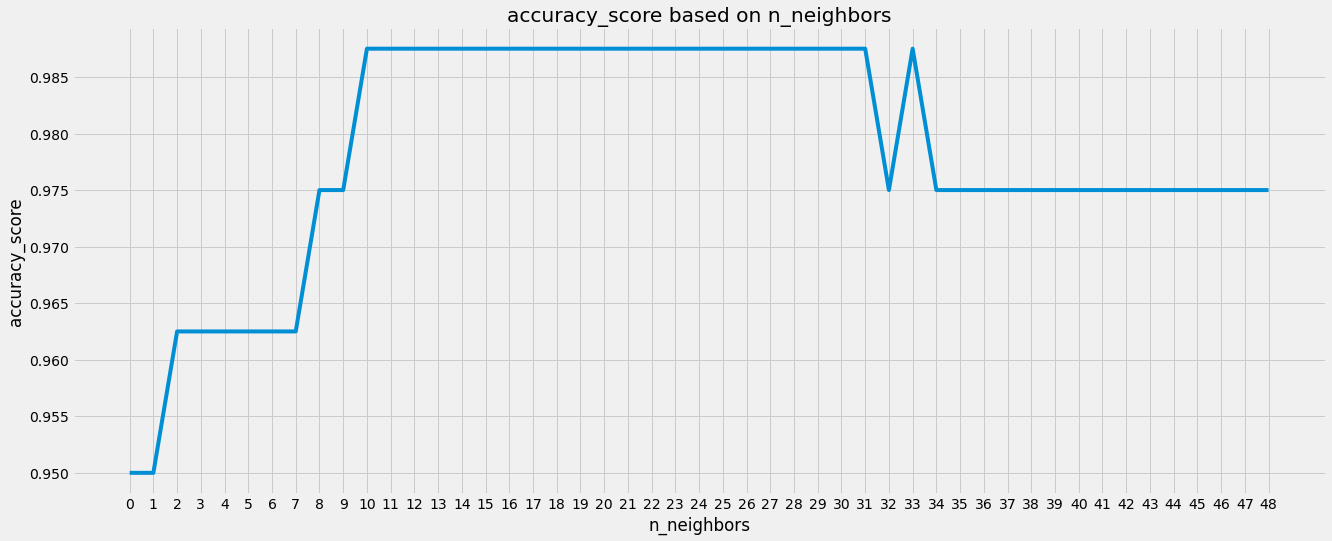

In [40]:
model_scores = []
for n_neighbors in range(1, 50):
  model = KNeighborsClassifier(n_neighbors=n_neighbors)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_val) 
  model_scores.append(accuracy_score(y_val, y_pred))

fig, ax = plt.subplots(figsize=(20, 8))
sns.lineplot(data=model_scores, ax=ax).set_title(f'accuracy_score based on n_neighbors')
ax.set(xlabel='n_neighbors', ylabel='accuracy_score')
plt.xticks(np.arange(0, len(model_scores), 1))

plt.show()

In [41]:
model = KNeighborsClassifier(n_neighbors=20)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.97      1.00      0.98        30

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [42]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        50
           1       1.00      0.93      0.97        30

    accuracy                           0.97        80
   macro avg       0.98      0.97      0.97        80
weighted avg       0.98      0.97      0.97        80



In [43]:
def plot_confusion_matrix(y_test, y_pred):
  fig, ax = plt.subplots(figsize=(6, 6))
  sns.heatmap(confusion_matrix(y_test, y_pred),
              annot=True,
              cbar=False,
              cmap='flare').set_title('Confusion Matrix')
  
  ax.set(xlabel='Predicted Label', ylabel='Test Label')
  plt.show()

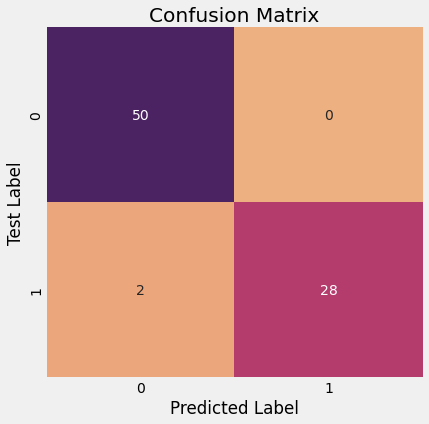

In [44]:
plot_confusion_matrix(y_test, y_pred)

The experimentation so far is decent with a simple machine learning model. Further experimentation in the future would be:

* Collecting more data to train, validate, and test.
* Trying out different techniques on data issues handling, such as Pandas get_dummies to one-hot encode categorical attributes and many more.
* Expanding data exploration for in-depth understanding of the data.
* Trying out other machine learning model, especially ensembles like random forest classifier that differs from k-Nearest Neighbors where the given data is not required to be normalized.
* Applying cross-validation with custom amount of folds to ensure the model generalized well.
* Scoring model on different metrics depending on how the class is distributed within the data.